# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

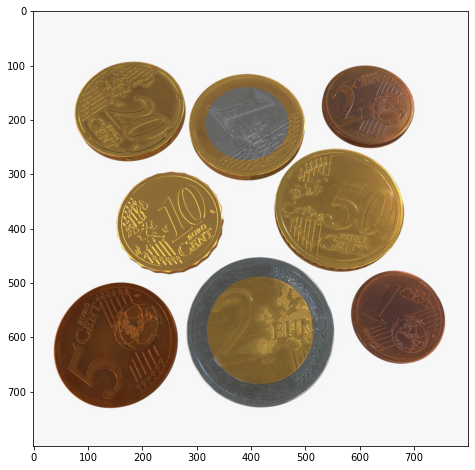

In [112]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

In [113]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize = (20,15));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

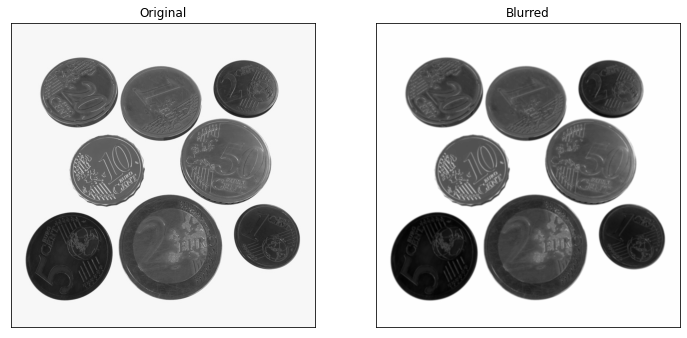

In [114]:
# Convert the image above to grayscale
gray_coins = cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (12,8))
plt.imshow(gray_coins, cmap='gray');


# Apply some gaussian blur to it (try differente size kernels)

blur = cv2.GaussianBlur(gray_coins,(5,5),0)


plt.subplot(121),plt.imshow(gray_coins, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()




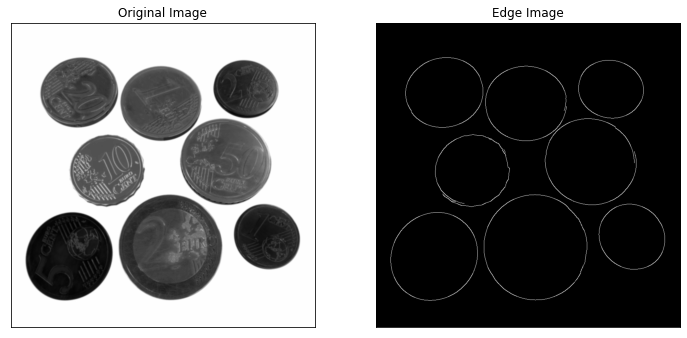

In [115]:
# Apply Canny to find edges and display the image 
edges = cv2.Canny(blur,100,500)


plt.figure(figsize = (12,8))
plt.subplot(121),plt.imshow(blur,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

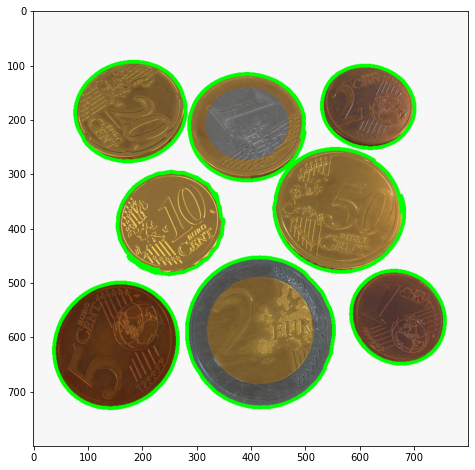

In [116]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

coins_contours, hierarch = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

coin = rgb_coins.copy()
cv2.drawContours(coin, coins_contours, -1, (0,255,0),5)
plt.figure(figsize = (12,8))
plt.imshow(coin, cmap='gray')

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

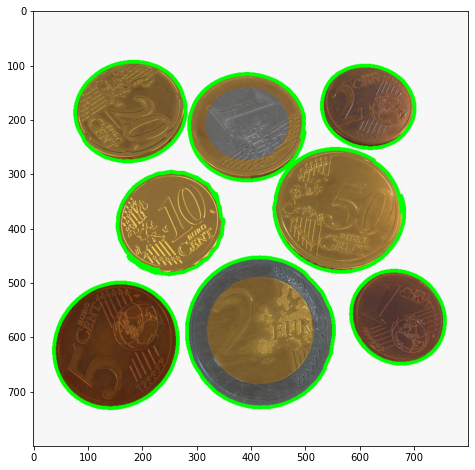

In [117]:
# print the number of contours that has been found
sorted_contours = sorted(coins_contours, key=cv2.contourArea, reverse = True)
c = coins_contours
cv2.drawContours(coin, c, -1, (0,255,0),2)
plt.figure(figsize = (12,8))
plt.imshow(coin, cmap='gray')

In [118]:
len(c)

12

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

8

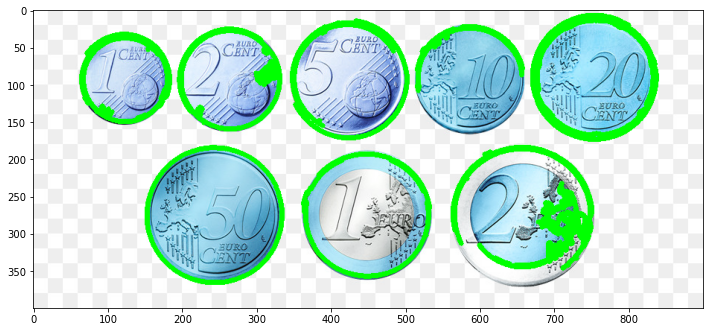

In [40]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise

color_coins = cv2.imread('img/coins.jpg', cv2.IMREAD_COLOR)

gray_coins = cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray_coins,(1,1),0)
edges = cv2.Canny(blur,100,200)

coins_contours, hierarch = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



sorted_contours = sorted(coins_contours, key=cv2.contourArea, reverse = True)

c=sorted_contours[0:8]

coin = color_coins.copy()
cv2.drawContours(coin, c, -1, (0,255,0),5)
plt.figure(figsize = (12,8))
plt.imshow(coin, cmap='gray')



len(c)

#plt.imshow(edges, cmap='gray')

## Sorting Contours

### By area

In [41]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [ ]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


In [ ]:
# Print the contour areas to screen


In [ ]:
# Now sort the areas by biggest to smallest and print the sorted areas


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [ ]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas


In [ ]:
# Filter out only the 5 biggest contours and print them


[Hint](# "Just slice the array!") 

In [ ]:
# Now in a clean image draw the contours you just filtered out and display it


In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 